# Sentiment Analysis

_Artificial Intelligence Nanodegree Program | Natural Language Processing_

---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called _sentiment analysis_. In this notebook you will build an end-to-end sentiment classification system from scratch.

## Instructions

Some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this notebook. You will not need to modify the included code beyond what is requested. Sections that begin with '**TODO**' in the header indicate that you need to complete or implement some portion within them. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `# TODO: ...` comment. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions for you to answer which relate to the task and your implementation. Each section where you will answer a question is preceded by a '**Question:**' header. Carefully read each question and provide your answer below the '**Answer:**' header by editing the Markdown cell.

> **Note**: Code and Markdown cells can be executed using the **Shift+Enter** keyboard shortcut. In addition, a cell can be edited by typically clicking it (double-click for Markdown cells) or by pressing **Enter** while it is highlighted.

## Step 1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.

We have provided the dataset for you. You can load it in by executing the Python cell below.

In [4]:
import os
import glob

def read_imdb_data(data_dir='data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f, encoding="utf8") as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [24]:
print(data['train']['pos'][2])

Brilliant over-acting by Lesley Ann Warren. Best dramatic hobo lady I have ever seen, and love scenes in clothes warehouse are second to none. The corn on face is a classic, as good as anything in Blazing Saddles. The take on lawyers is also superb. After being accused of being a turncoat, selling out his boss, and being dishonest the lawyer of Pepto Bolt shrugs indifferently "I'm a lawyer" he says. Three funny words. Jeffrey Tambor, a favorite from the later Larry Sanders show, is fantastic here too as a mad millionaire who wants to crush the ghetto. His character is more malevolent than usual. The hospital scene, and the scene where the homeless invade a demolition site, are all-time classics. Look for the legs scene and the two big diggers fighting (one bleeds). This movie gets better each time I see it (which is quite often).


And one with a negative sentiment:

In [25]:
print(data['train']['neg'][2])

This film lacked something I couldn't put my finger on at first: charisma on the part of the leading actress. This inevitably translated to lack of chemistry when she shared the screen with her leading man. Even the romantic scenes came across as being merely the actors at play. It could very well have been the director who miscalculated what he needed from the actors. I just don't know.<br /><br />But could it have been the screenplay? Just exactly who was the chef in love with? He seemed more enamored of his culinary skills and restaurant, and ultimately of himself and his youthful exploits, than of anybody or anything else. He never convinced me he was in love with the princess.<br /><br />I was disappointed in this movie. But, don't forget it was nominated for an Oscar, so judge for yourself.


We can also make a wordcloud visualization of the reviews.

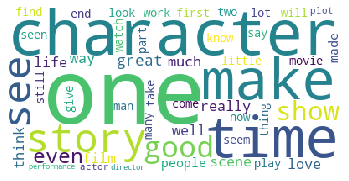

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'pos'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

Try changing the sentiment to `'neg'` and see if you can spot any obvious differences between the wordclouds.

### TODO: Form training and test sets

Now that you've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [27]:
from sklearn.utils import shuffle

def prepare_imdb_data(data):
    """Prepare training and test sets from IMDb movie reviews."""
    
    # TODO: Combine positive and negative reviews and labels
    data_train=data['train']['pos']+data['train']['neg']
    labels_train=labels['train']['pos']+labels['train']['neg']
    data_test=data['test']['pos']+data['test']['neg']
    labels_test=labels['test']['pos']+labels['test']['neg']
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    data_test, labels_test = shuffle(data_test, labels_test)
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

print(data_train[100])
print(data_test[100])

IMDb reviews (combined): train = 25000, test = 25000
After hearing raves about this movie for years, I finally decided to rent it and watch. Let me start by saying that I'm glad that the rental was free from the local library. This move was slow, boring, unrealistic and the plot made no sense. After 2 hours, I was ready to nuke that backwater Texas town and put the group of those characters out of their misery. I realize that taste is subjective, but believe me, I just do not understand all of the hype that I have heard about this movie. Dallas provided as good a detail of the life in Texas as this movie. Rent it only if you want to understand how movie studios can pay enough money to reviewers to convince the general public that a bad movie is good.
It's possible to have a good time with this film while, at the same time, regretting all that it isn't. In the 1980s, a raffish U.S. congressman (Tom Hanks) engineers support for Afghan partisans resisting the Soviet Union.<br /><br />Hank

## Step 2. Preprocessing

As you might have noticed in the sample reviews, our raw data includes HTML. Therefore there are HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.

### TODO: Convert each review to words

As your next task, you should complete the function `review_to_words()` that performs all these steps. For your convenience, in the Python cell below we provide you with all the libraries that you may need in order to accomplish these preprocessing steps. Make sure you can import all of them! (If not, pip install from a terminal and run/import again.)

In [28]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem

    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    
       
    # Return final list of words
    return words


print(review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!"""))

print(review_to_words(data_train[100]))

['test', 'test', 'would', 'make', 'great', 'movi', 'review']
['hear', 'rave', 'movi', 'year', 'final', 'decid', 'rent', 'watch', 'let', 'start', 'say', 'glad', 'rental', 'free', 'local', 'librari', 'move', 'slow', 'bore', 'unrealist', 'plot', 'made', 'sens', '2', 'hour', 'readi', 'nuke', 'backwat', 'texa', 'town', 'put', 'group', 'charact', 'miseri', 'realiz', 'tast', 'subject', 'believ', 'understand', 'hype', 'heard', 'movi', 'dalla', 'provid', 'good', 'detail', 'life', 'texa', 'movi', 'rent', 'want', 'understand', 'movi', 'studio', 'pay', 'enough', 'money', 'review', 'convinc', 'gener', 'public', 'bad', 'movi', 'good']


With the function `review_to_words()` fully implemeneted, we can apply it to all reviews in both training and test datasets. This may take a while, so let's build in a mechanism to write to a cache file and retrieve from it later.

In [30]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
I saw it at the Legacy Theater in the Joseph Smith Memorial Building in Salt Lake City this morning. I'm going to assume that one's level of enjoyment during this movie will largely be based on one's level of acceptance of Joseph's story.<br /><br />However, that aside it was very well made, well acted, and had a nice score. If you get to Salt Lake City, it is a must to see it in the Legacy Theater. I have never been in a nicer theater as far as picture quality, sound quality and ambiance in my entire life...I wonder if the Church would let me watch Batman Begins there! Being that I'm LDS and regard Joseph as a prophet, I was touched in several places and was brought to tears quite a few times...which I presume is expected since they handed out tissues BEFORE the movie started! Anyway, I'm told that this film is available in several LDS Visitor Centers around the globe, if you have 70 minutes check it out

## Step 3: Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we are not allowed to peek at the testing data at all!

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What do you do if you encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### TODO: Compute Bag-of-Words features

Implement the `extract_BoW_features()` function, apply it to both training and test datasets, and store the results in `features_train` and `features_test` NumPy arrays, respectively. Choose a reasonable vocabulary size, say $|V| = 5000$, and keep only the top $|V|$ occuring words and discard the rest. This number will also serve as the number of columns in the BoW matrices.

> **Hint**: You may find it useful to take advantage of `CountVectorizer` from scikit-learn. Also make sure to pickle your Bag-of-Words transformation so that you can use it in future.

In [31]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays

def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # TODO: Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
        vectorizer = CountVectorizer(preprocessor=lambda x: x,tokenizer=lambda x: x, lowercase=False,max_features=5000)
        features_train = vectorizer.fit_transform(words_train).toarray()


        # TODO: Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test = vectorizer.fit_transform(words_test).toarray()
        
        # NOTE: Remember to convert the features using .toarray() for a compact representation
        
        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

D:\ProgramasInstalados\Anaconda3\envs\nlp\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['g', 'reluct', 'fool', 'degre', 'bulli', 'legal', 'underworld', 'exercis']

--- Preprocessed words ---
['excel', 'reason', 'edison', 'went', 'straight', 'video', 'would', 'land', 'theater', 'crumbl', 'thud', 'movi', 'last', 'entir', 'long', 'peril', 'bore', 'notch', 'lowbrow', 'thank', 'freeman', 'spacey', 'obvious', 'spare', 'two', 'week', 'next', 'film', 'bad', 'guy', 'laughabl', 'action', 'near', 'non', 'exist', 'justin', 'timberlak', 'act', 'hate', 'knock', 'guy', 'sooner', 'realiz', 'pop', 'fort', 'better', 'movi', 'bad', 'mostli', 'like', 'fact', 'cool', 'j', 'given', 'appear', 'shot', 'lead', 'man', 'deserv', 'unlik', 'fellow', 'musician', 'co', 'star', 'act', 'kevin', 'spacey', 'almost', 'alway', 'enjoy', 'well', 'see', 'gulp', 'sever', 'time', 'chew', 'sceneri', 'freeman', 'abil', 'elev', 'flick', 'three', 'star', 'ten', 'good', 'said', 'done', 'ultim', 'error', 'movi', 'mundan', 'tiresom', '

Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

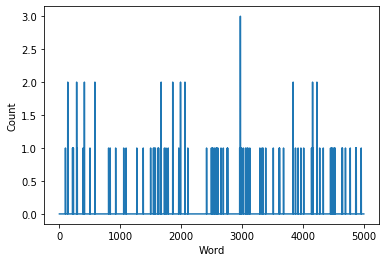

In [32]:
# Plot the BoW feature vector for a training document
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

#### Question: Reflecting on Bag-of-Words feature representation

What is the average sparsity level of BoW vectors in our training set? In other words, on average what percentage of entries in a BoW feature vector are zero?

#### Answer:

...

### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

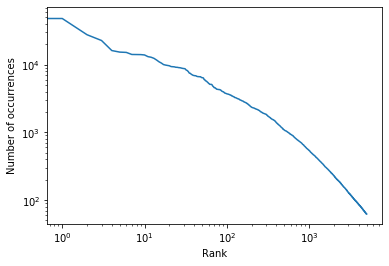

In [33]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

#### Question: Zipf's law

What is the total number of occurrences of the most frequent word? What is the the total number of occurrences of the second most frequent word? Do your numbers follow  Zipf's law? If not, why?

#### Answer:

...

### TODO: Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, let's normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [34]:
import sklearn.preprocessing as pr

# TODO: Normalize BoW features in training and test set
features_train = pr.normalize(features_train)
features_test = pr.normalize(features_test)

## Step 4: Classification using BoW features

Now that the data has all been properly transformed, we can feed it into a classifier. To get a baseline model, we train a Naive Bayes classifier from scikit-learn (specifically, [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), and evaluate its accuracy on the test set.

In [3]:
from sklearn.naive_bayes import GaussianNB

# TODO: Train a Guassian Naive Bayes classifier
clf1 = GaussianNB()
clf1.fit(features_train, labels_train)

# Calculate the mean accuracy score on training and test sets
print("[{}] Accuracy: train = {}, test = {}".format(
        clf1.__class__.__name__,
        clf1.score(features_train, labels_train),
        clf1.score(features_test, labels_test)))

NameError: name 'features_train' is not defined

Tree-based algorithms often work quite well on Bag-of-Words as their highly discontinuous and sparse nature is nicely matched by the structure of trees. As your next task, you will try to improve on the Naive Bayes classifier's performance by using scikit-learn's Gradient-Boosted Decision Tree classifer.

### TODO: Gradient-Boosted Decision Tree classifier

Use [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from scikit-learn to classify the BoW data. This model has a number of parameters. We use default parameters for some of them and pre-set the rest for you, except one: `n_estimators`. Find a proper value for this hyperparameter, use it to classify the data, and report how much improvement you get over Naive Bayes in terms of accuracy.

> **Tip**: Use a model selection technique such as cross-validation, grid-search, or an information criterion method, to find an optimal value for the hyperparameter.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 30

def classify_gboost(X_train, X_test, y_train, y_test):        
    # Initialize classifier
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=3, random_state=0)

    # TODO: Classify the data using GradientBoostingClassifier
    clf.fit(X_train, y_train)
    
    # TODO(optional): Perform hyperparameter tuning / model selection
    
    # TODO: Print final training & test accuracy
    print("[{}] Accuracy: train = {}, test = {}".format(
        clf.__class__.__name__,
        clf.score(features_train, labels_train),
        clf.score(features_test, labels_test)))
    
    # Return best classifier model
    return clf


clf2 = classify_gboost(features_train, features_test, labels_train, labels_test)

### TODO: Adverserial testing

Write a short movie review to trick your machine learning model! That is, a movie review with a clear positive or negative sentiment that your model will classify incorrectly.

> **Hint**: You might want to take advantage of the biggest weakness of the Bag-of-Words scheme!

In [ ]:
# TODO: Write a sample review and set its true sentiment
my_review = "Despite a compelling lead performance by Tom Hanks and a great soundtrack, Forrest Gump never gets out of the shadow of its weak plot and questionable premise"
true_sentiment = 'neg'  # sentiment must be 'pos' or 'neg'


# TODO: Apply the same preprocessing and vectorizing steps as you did for your training data
my_review_words = review_to_words(my_review)

# TODO: Then call your classifier to label it
#predicted_sentiment = clfl.predict(my_bow_features)[0]
#print("--- My review ---")

vectorizer=CountVectorizer(max_features=len(vocabulary), preprocessor=lambda x:x, tokenizer=lambda x:x)
vectorizer=vectorizer.fit(words_train)
my_review_features=vectorizer.transform([my_review_words]).toarray()
my_eview_features=pr.normalize(my_review_features)
print(clf2.predict(my_review_features))
#['pos']


## Step 5: Switching gears - RNNs

We just saw how the task of sentiment analysis can be solved via a traditional machine learning approach: BoW + a nonlinear classifier. We now switch gears and use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras. Conveniently, Keras has a built-in [IMDb movie reviews dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) that we can use, with the same vocabulary size.

In [36]:
import numpy as np

#!pip install keras
from keras.datasets import imdb  # import the built-in imdb dataset in Keras


# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

# Set the vocabulary size
vocabulary_size = 5000

# Load in training and test data (note the difference in convention compared to scikit-learn)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)

# restore np.load for future normal usage
np.load = np_load_old
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [37]:
# Inspect a sample review and its label
print("--- Review ---")
print(X_train[7])
print("--- Label ---")
print(y_train[7])

--- Review ---
[1, 4, 2, 716, 4, 65, 7, 4, 689, 4367, 2, 2343, 4804, 2, 2, 2, 2, 2315, 2, 2, 2, 2, 4, 2, 628, 2, 37, 9, 150, 4, 2, 4069, 11, 2909, 4, 2, 847, 313, 6, 176, 2, 9, 2, 138, 9, 4434, 19, 4, 96, 183, 26, 4, 192, 15, 27, 2, 799, 2, 2, 588, 84, 11, 4, 3231, 152, 339, 2, 42, 4869, 2, 2, 345, 4804, 2, 142, 43, 218, 208, 54, 29, 853, 659, 46, 4, 882, 183, 80, 115, 30, 4, 172, 174, 10, 10, 1001, 398, 1001, 1055, 526, 34, 3717, 2, 2, 2, 17, 4, 2, 1094, 871, 64, 85, 22, 2030, 1109, 38, 230, 9, 4, 4324, 2, 251, 2, 1034, 195, 301, 14, 16, 31, 7, 4, 2, 8, 783, 2, 33, 4, 2945, 103, 465, 2, 42, 845, 45, 446, 11, 1895, 19, 184, 76, 32, 4, 2, 207, 110, 13, 197, 4, 2, 16, 601, 964, 2152, 595, 13, 258, 4, 1730, 66, 338, 55, 2, 4, 550, 728, 65, 1196, 8, 1839, 61, 1546, 42, 2, 61, 602, 120, 45, 2, 6, 320, 786, 99, 196, 2, 786, 2, 4, 225, 4, 373, 1009, 33, 4, 130, 63, 69, 72, 1104, 46, 1292, 225, 14, 66, 194, 2, 1703, 56, 8, 803, 1004, 6, 2, 155, 11, 4, 2, 3231, 45, 853, 2029, 8, 30, 6, 117, 430

Notice that the label is an integer (0 for negative, 1 for positive), and the review itself is stored as a sequence of integers. These are word IDs that have been preassigned to individual words. To map them back to the original words, you can use the dictionary returned by `imdb.get_word_index()`.

In [38]:
# Map word IDs back to words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print("--- Review (with words) ---")
print([id2word.get(i, " ") for i in X_train[7]])
print("--- Label ---")
print(y_train[7])

--- Review (with words) ---
['the', 'of', 'and', 'local', 'of', 'their', 'br', 'of', 'attention', 'widow', 'and', 'captures', 'parties', 'and', 'and', 'and', 'and', 'excitement', 'and', 'and', 'and', 'and', 'of', 'and', 'english', 'and', 'like', 'it', 'years', 'of', 'and', 'unintentional', 'this', 'hitchcock', 'of', 'and', 'learn', 'everyone', 'is', 'quite', 'and', 'it', 'and', 'such', 'it', 'bonus', 'film', 'of', 'too', 'seems', 'he', 'of', 'enough', 'for', 'be', 'and', 'editing', 'and', 'and', 'please', 'great', 'this', 'of', 'shoots', 'thing', '3', 'and', "it's", 'mentioning', 'and', 'and', 'given', 'parties', 'and', 'back', 'out', 'interesting', 'times', 'no', 'all', 'average', 'talking', 'some', 'of', 'nor', 'seems', 'into', 'best', 'at', 'of', 'every', 'cast', 'i', 'i', 'inside', 'keep', 'inside', 'large', 'viewer', 'who', 'obscure', 'and', 'and', 'and', 'movie', 'of', 'and', 'entirely', "you've", 'see', 'because', 'you', 'deals', 'successful', 'her', 'anything', 'it', 'of', 'ded

Unlike our Bag-of-Words approach, where we simply summarized the counts of each word in a document, this representation essentially retains the entire sequence of words (minus punctuation, stopwords, etc.). This is critical for RNNs to function. But it also means that now the features can be of different lengths!

#### Question: Variable length reviews

What is the maximum review length (in terms of number of words) in the training set? What is the minimum?

#### Answer:

...


### TODO: Pad sequences

In order to feed this data into your RNN, all input documents must have the same length. Let's limit the maximum review length to `max_words` by truncating longer reviews and padding shorter reviews with a null value (0). You can accomplish this easily using the [`pad_sequences()`](https://keras.io/preprocessing/sequence/#pad_sequences) function in Keras. For now, set `max_words` to 500.

In [39]:
from keras.preprocessing import sequence

# Set the maximum number of words per document (for both training and testing)
max_words = 500

# TODO: Pad sequences in X_train and X_test
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

### Diseño del modelo RNN para el análisis de sentimientos

A continuación se presentan tres modelos propuestos para realizar el Deep Learning de la data propuesta.

Para todos los modelos propuestos se especifica un tamaño máximo de palabras `max_words`, el resultado que se obtendrá será el senteimiento 0-->Negativo, 1-->Positivo

Los diseños para RNN con Keras  se basa en capas que pueden ser añadidas, o quitadas, con la finalidad de encontrar el mejor conjunto de capas para un set de datos determinado.

Keras permite realizar modelos de diferentes arquitecturas, una que se adapta a al a mayoría de situaciones es la arquitectura secuencial que permite la creación de modelos capa a capa, pero no permite compartir capas o tener múltiples entradas con múltiples salidas, en este caso deberíamos optar por otra arquitectura.[1]

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

#
#!pip install tensorflow-hub
#!pip install bert-tensorflow
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#server = tf.train.Server.create_local_server()
#
server= tf.train.Server.create_local_server()
sess = tf.Session(server.target)
from keras import backend as K
K.set_session(sess)
#tf.keras.backend.set_session(sess)

# Set the vocabulary size
vocabulary_size = 5000

# Set the maximum number of words per document (for both training and testing)
max_words = 500

## Modelo 1

Para nuestro primero modelo utilizaremos el API secuencial de Keras. Esta arquitectura permite ir añadiendo capas segun nuestro gusto y necesidades.

Debemos tomar en cuenta el número de entradas y features.

Keras, permite crear un modelo flexible, por lo que es difícil estimar el número de capas que debe tener un modelo para un problema específico. La idea es, que nuestro modelo se adapte a la estructura del problema.

A nuestro modelo le hemos añadido una capa LSTM, que convierte a nuestra red en recurrente. Esto permite que nuestro modelo se adapte según el comportamiento dependiendo de la secuencia. Permite que se haga una retroalimentación de la salida del modelo[2]


![LSTM cell diagram](imagenes/LSTM-diagram.png)

El gráfico representa una celda LSTM, esta celda recibe la palabra(x) conjuntamente con la salida previa (h), esta entrada es entonces calculada commbinada con la capa (tanh), para luego atravesar una puerta en donde se activarán con el sigmoide, que filtrará los datos de entrada.

Posteriormente, se utiliza la capa `Dropout`, la intención de esta capa es evitar el sobreentrenamiento (overfitting).CORREGIR EL DROPOUT DESPUES DE LA CAPA DE ACTIVACION.

Para esta primera propuesta, conectaremos todas las capas, para este objetivo es necesario utilizar la clase Dense. En esta clase especificamos el número de neuronas, iniciaremos con un valor de `1`, y especificaremos la función de activacion `sigmoide`.

La capa Desnse es la implementación de la ecuación de salida=activation(dot(input, kernel) + bias. Se toma el producto puno entre la entrada y cualquiera que sea el resultado, este peso es caracterizado en la capa Dense. Luego se añade el vector `bias` y luego se toma un elemento de activación de los valores de salida.


### Diseño 1

In [41]:
#Código compatible con tensorflow 2.0
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Embedding(vocabulary_size, 128, input_length=max_words))
model1.add(tf.keras.layers.LSTM(128))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Código compatible con tensorflow 1.x
#model = Sequential()
#model.add(Embedding(vocabulary_size, 128, input_length=max_words))
#model.add(LSTM(128))
#model.add(Dropout(0.2))
#model.add(Dense(1, activation='sigmoid'))


print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
Total params: 771,715
Trainable params: 771,715
Non-trainable params: 0
________________________________________________

### Entrenamiento y valoración del modelo 1

Antes de entrenar el modelo, se enecesita un proceso de compilación, además, especificar función de pérdida y el optimizador que se utilizará en el entrenamiento, de igual manera las métricas que se desean evaluar. En nuestro caso el `accuracy`.

In [44]:
# TODO: Compile your model, specifying a loss function, optimizer, and metrics
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss='sparse_categorical_crossentropy'

A continuación se especifican dos parámetros, - **batch size** and **number of training epochs**, factores que nos ayudan a determinar el tiempo de entrenamiento total

En este caso, no se utilizó el GPU, por cuestiones de hardware, para agilitar los cálculos se deberían utilizar, caso contrario el proceso puede tomar horas.


> **Tip**: Podemos dividir una parte del set para training que será usado para la validación durante el entrenamiento.
Sirva para monitoreo y verificar un posible sobre entrenamiento. Se da un set para validación al `model.fit()` usando el parámetro `validation_data`, o solo especificando `validation_split` - una fracción de los datos de entrenamiento para Keras, se separa para este propósito (entre 5-10%). Las métricas son evaluadas una vez que termina cada epoch(veces).

In [2]:
# TODO: Specify training parameters: batch size and number of epochs
#batch_size = 512
batch_size = 128
num_epochs = 3

# TODO(optional): Reserve/specify some training data for validation (not to be used for training)

# TODO: Train your model
model1.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_test, y_test))

NameError: name 'model1' is not defined

In [ ]:
# Save your model, so that you can quickly load it in future (and perhaps resume training)
model_file = "rnn_model1.h5"  # HDF5 file
model.save(os.path.join(cache_dir, model_file))

# Later you can load it using keras.models.load_model()
#from keras.models import load_model
#model = load_model(os.path.join(cache_dir, model_file))

## Rendimiento
Se estimará con los datos de test el modelo.

In [ ]:
# Evaluate your model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

## Modelo 2

Para nuestro segundo modelo realizaremos un cambio de posición en el Dropout, esto lo hacemos debido a las sugerencias en las referencias revisadas en [3] que nos recomiendan ubicar el Dropout después de las funciones de activación que no sean `Relu`. Al inicio se especificó una probabilidad del 20% para el Dropout, ahora lo haremos al 50%, esto es, hay un cambio del 50% de que la salida de una neurona dada, sea 0. Sumaremos una capa mas, no existe una regla general[4], pero verificaremos que sucede con el accuracy, el resto de parámetros los mantendremos.

### Diseño 2

In [48]:
#Código compatible con tensorflow 2.0
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(vocabulary_size, 128, input_length=max_words))
model2.add(tf.keras.layers.LSTM(128))

model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#Reubicamos el Dropout
model2.add(tf.keras.layers.Dropout(0.5))

#Código compatible con tensorflow 1.x
#model = Sequential()
#model.add(Embedding(vocabulary_size, 128, input_length=max_words))
#model.add(LSTM(128))
#model.add(Dropout(0.2))
#model.add(Dense(1, activation='sigmoid'))


print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          640000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
_________________________________________________________________
dropout_7 (Dropout)          (None, 1)                 0         
Total params: 771,713
Trainable params: 771,713
Non-trainable params: 0
_________________________________________________________________
None


### Entrenamiento y valoración del modelo 2

Antes de entrenar el modelo, se enecesita un proceso de compilación, además, especificar función de pérdida y el optimizador que se utilizará en el entrenamiento, de igual manera las métricas que se desean evaluar. En nuestro caso el `accuracy`.

In [49]:
#Compilación
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Entrenamiento
batch_size = 128
num_epochs = 3

# TODO(optional): Reserve/specify some training data for validation (not to be used for training)

# TODO: Train your model
model2.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 3563s 143ms/sample - loss: 4.2191 - acc: 0.5716 - val_loss: 0.7353 - val_acc: 0.5366
Epoch 2/3
 2816/25000 [==>...........................] - ETA: 7:56 - loss: 3.9262 - acc: 0.6683

#### Comparación del RNN con los métodos tradicionales
En el caso de BoW y Gradient-Boosted los resultados son muy superiores.



## Extensions

There are several ways in which you can build upon this notebook. Each comes with its set of challenges, but can be a rewarding experience.

- The first thing is to try and improve the accuracy of your model by experimenting with different architectures, layers and parameters. How good can you get without taking prohibitively long to train? How do you prevent overfitting?

- Then, you may want to deploy your model as a mobile app or web service. What do you need to do in order to package your model for such deployment? How would you accept a new review, convert it into a form suitable for your model, and perform the actual prediction? (Note that the same environment you used during training may not be available.)

- One simplification we made in this notebook is to limit the task to binary classification. The dataset actually includes a more fine-grained review rating that is indicated in each review's filename (which is of the form `<[id]_[rating].txt>` where `[id]` is a unique identifier and `[rating]` is on a scale of 1-10; note that neutral reviews > 4 or < 7 have been excluded). How would you modify the notebook to perform regression on the review ratings? In what situations is regression more useful than classification, and vice-versa?

Whatever direction you take, make sure to share your results and learnings with your peers, through blogs, discussions and participating in online competitions. This is also a great way to become more visible to potential employers!

# Referencias
- [1] Keras LSTM tutorial – How to easily build a powerful deep learning language model, disponible en: https://adventuresinmachinelearning.com/keras-lstm-tutorial/
- [2] Your First Deep Learning Project in Python with Keras Step-By-Step https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
- [3] Dropout Neural Network Layer In Keras Explained https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab
- [4] Dense https://keras.io/layers/core/
